In [ ]:
#These are the packages I needed to install 
#You can find Ripser documentation here: https://ripser.scikit-tda.org/en/latest/
#                              and here: https://github.com/scikit-tda/ripser.py

In [ ]:
pip install wheel

In [ ]:
pip install ripser

In [6]:
import array
from re import S
import random
import os  # Operating system module
import time  # time keeping module
import pickle  # Python object serialization module
import pywt  # Wavelet transform python module
import datetime  # Dates and times module
import numpy as np  # Numerical arrays module
import scipy as sp  # Mathematics and engineering module
import pandas as pd  # Dataframe manipulation module
import ripser as rip  # Persistent homology of Rips filtration module
import seaborn as sns  # Plotting and visualization module
import multiprocessing  # Parallelization module
import itertools as itt  # Efficient iterator module
import scipy.signal as sgl  # Signal processing module
from functools import partial  # Allows defining new functions with specified arguments
import matplotlib.pyplot as plt  # Plotting and visualization module
from scipy.spatial import distance #Finding distance between two points 
from scipy.spatial import distance_matrix #Allows me to create a distance matrix from an data frame of points
import numpy.matlib
from numpy import dot #This is the operation for a dot product of two vectors
from numpy.linalg import norm #This is the operation for a norm of a vector
from persim import plot_diagrams # Plot the Persistence Diagram
import time #Times how long it takes to execute code
import statistics #Finding the average of a list
import kmapper as km #The Mapper TDA tool 



def create_symm_matrix(size):
    """
    Creates a random size by size symmetric matrix with random integer entries and zeroes along the diagonal
    
    :param size: the order of the square matrix 
    
    """
    
    two = size*(size-1)/2 + size
    values = list(range(int(two)))
    random.shuffle(values)
    
    upper = np.zeros((size, size))
    upper[np.triu_indices(size, 0)] = values
    np.fill_diagonal(upper, 0)
    symm_m = upper + upper.T
    
    return(symm_m)




def create_geo_matrix(number, dimension, negative_distance = 0):
    '''
    Creates a matrix with distances between points and zeros on the diagonal
    
    :param number: The number of points that you want generated for the matrix(this will be the dimension of the matrix)
    :param dimension: The dimension of each point (creating dimension-tuples)
    :param negative_distance: 0 for the regular distance matrix and 1 for negative distances
    
    '''
    points = []
    for k in range(int(number)):
        
        #Creating each point with a for loop, letting each coordinate be a random number form 0 to 1
        point = []
        for i in range(int(dimension)):
            point.append(np.random.uniform(0,1))
        
        #Appending each of those points to a list of points 
        points.append(point)
    
        
    #Create a list with all the distances between the points
    distancess = []
    for i in points: 
        for j in points: 
            distancess.append(distance.euclidean(i,j))
            
    
    #Reshaping my list into a matrix 
    geo_matrix = np.reshape(distancess, (int(number), int(number)))
    
    if negative_distance == 1:
        geo_matrix = -geo_matrix
    
    
    
    return(geo_matrix)




def create_order_matrix(matrix):
    '''
    Get's a symmetric square matrix as an input and outputs a symmetric order matrix with zeros along the diagonal
    
    :param matrix: An  n by n matrix 
    
    '''
    #Getting the indices above the diagonal of our matrix and sorting the upper-diagonal values
    matrix = np.array(matrix)
    the_indices = np.triu_indices_from(matrix, k=1)
    sorted_things = np.argsort(np.argsort(matrix[the_indices]))
    
    #Getting the dimension of m to then make a zero matrix that we can put values in
    dimension_of_m = len(matrix)
    order_matrix = np.matlib.zeros((int(dimension_of_m), int(dimension_of_m)))
    
    #Creating an upper-triangular matrix with the sorted elements
    order_matrix[the_indices] = sorted_things
    
    #take the order matrix and it's transpose to make the symmetric matrix
    order_matrix = order_matrix + order_matrix.T
    
    return(np.array(order_matrix))




def plot_Betti_Curves(matrix, H_n):
    '''
    Function that takes either an order matrix or a correlation matrix, computes it persistence diagram from a Rips-filtration
    on the matrix, and plots its Betti Curves. 
    
    :param matrix: The matrix put in.This function accepts both order matrices and correlation matrices. 
    :param H_n: Maximum homology dimension computed. Accepted values for this function are 1,2, or 3.
    '''
    
    number_of_points = len(matrix[np.triu_indices_from(matrix, k=1)])
        
    vertices = matrix[np.triu_indices_from(matrix, k = 1)]
    vertices.sort()
        
    #Creating the x-values for the plots
    x_values_0 = list(range(len(matrix[np.triu_indices_from(matrix, k=1)])))
    x_values_0 = [x_values_0[i]/number_of_points for i in range(0, len(x_values_0))]
        
    #Computing the Persistence Diagrams using Ripser
    dgm = rip.ripser(matrix, maxdim = int(H_n), distance_matrix = True)['dgms']
            
    #Finding the Betti Numbers for each of the Homology Classes 
        
    if H_n >= 1:
        #H_1
        H_1 = dgm[1]
            
        Betti_numbers_1 = []

        for i in vertices:
            count_1 = 0
            for j in range(0, len(H_1.T[0])):
                if H_1.T[0][j] <= i and i < H_1.T[1][j]:
                    count_1 += 1
            Betti_numbers_1.append(count_1)
            
        plt.plot(x_values_0, Betti_numbers_1, color = "red")
        
    if H_n >= 2:
        #H_2
        H_2 = dgm[2]
            
        Betti_numbers_2 = []

        for i in vertices:
            count_2 = 0
            for j in range(0, len(H_2.T[0])):
                if H_2.T[0][j] <= i and i < H_2.T[1][j]:
                    count_2 += 1
            Betti_numbers_2.append(count_2)
            
        plt.plot(x_values_0, Betti_numbers_2, color = "green")
            
    if H_n >= 3:
        #H_3
        H_3 = dgm[3]
            
        Betti_numbers_3 = []

        for i in vertices:
            count_3 = 0
            for j in range(0, len(H_3.T[0])):
                if H_3.T[0][j] <= i and i < H_3.T[1][j]:
                    count_3 += 1
            Betti_numbers_3.append(count_3)
            
        plt.plot(x_values_0, Betti_numbers_3, color = "Blue")

In [7]:
#USING RIPS

#First I create the matrices
geo_matrix = create_geo_matrix(88, 88, negative_distance = 0)

symmetric_matrix = create_symm_matrix(88)

In [9]:
#The persistence diagrams for each of the matrices in the form of coordinate points for each of the classes
rip.ripser(geo_matrix, maxdim = 2, distance_matrix = True)
rip.ripser(symmetric_matrix, 2, distance_matrix = True)

{'dgms': [array([[  0.,   1.],
         [  0.,   2.],
         [  0.,   3.],
         [  0.,   4.],
         [  0.,   5.],
         [  0.,   6.],
         [  0.,   7.],
         [  0.,   8.],
         [  0.,   9.],
         [  0.,  10.],
         [  0.,  11.],
         [  0.,  12.],
         [  0.,  13.],
         [  0.,  14.],
         [  0.,  15.],
         [  0.,  16.],
         [  0.,  17.],
         [  0.,  18.],
         [  0.,  19.],
         [  0.,  20.],
         [  0.,  21.],
         [  0.,  22.],
         [  0.,  23.],
         [  0.,  24.],
         [  0.,  25.],
         [  0.,  26.],
         [  0.,  27.],
         [  0.,  28.],
         [  0.,  29.],
         [  0.,  30.],
         [  0.,  31.],
         [  0.,  32.],
         [  0.,  33.],
         [  0.,  34.],
         [  0.,  35.],
         [  0.,  36.],
         [  0.,  37.],
         [  0.,  38.],
         [  0.,  39.],
         [  0.,  40.],
         [  0.,  42.],
         [  0.,  43.],
         [  0.,  44.],
   

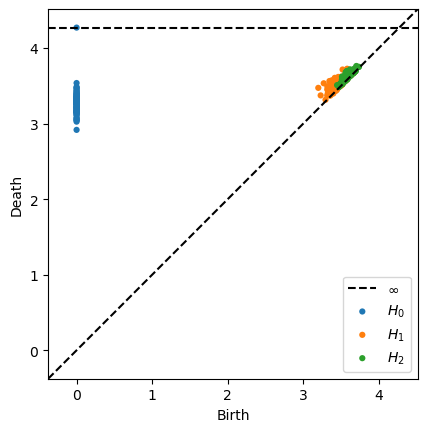

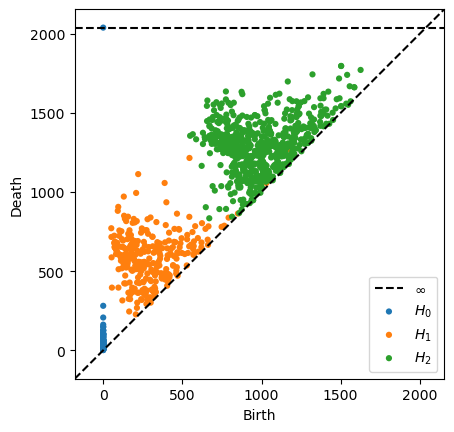

In [10]:
#You can use a built-in function from ripser to graph the Persistence Diagrams
#The Persistence Diagrams plots the (birth, death) coordinates of features (clusters, holes, and voids in this case)
#There is one blue dot on the dotted line for each of the diagrams; this is because all the connected components eventually
#   merge and we are left with only one that lives forever.

#Need to isolate the diagrams by adding the ['dgms'] at the end
geo_diagrams = rip.ripser(geo_matrix, maxdim = 2, distance_matrix = True)['dgms']
symm_diagrams = rip.ripser(symmetric_matrix, 2, distance_matrix = True)['dgms']

plot_diagrams(geo_diagrams, show=True)
plot_diagrams(symm_diagrams, show=True)

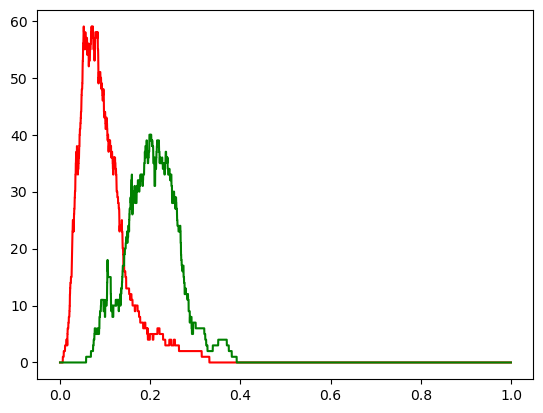

In [12]:
#I created a function that allows us to plot the Betti Curves as well; you just need the matrices as the inputs here
#  and the max dimension you wish to compute. The following Betti Curves will only show H_1 and H_2 and not H_0

plot_Betti_Curves(geo_matrix, 2)

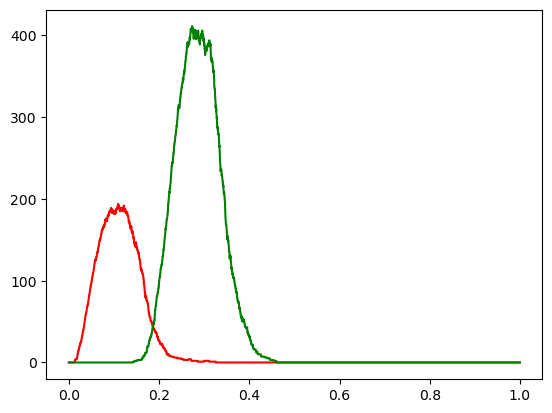

In [13]:
plot_Betti_Curves(symmetric_matrix, 2)